# _k_-Nearest Neighbors
## Starting with an Analogy

## Friend inventory

<img src="img/bullseye2.png" width="450">

## Friend Inventory
### What would each person choose?

<img src="img/movies.png" width="450">

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?
- All of it?

Share with your neighbor what movie you'd end up seeing.

## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
<img src="img/movies.png" width="450">



## Friend Inventory
### What's the "algorithm" we used for this process?

### How does this relate to _k_-nearest neighbors (_k_-NN)?

<img src="img/bullseye-annotate.png" width="450">

# Starting Off

We are going to use the Pima Native Americans diabetes dataset.  
Can we use $k$-NN to classify people correctly and then **predict if someone will have diabetes**?

# Implementing a _k_-Nearest Neighbors Model

## Objective: 
- To be able to implement a $k$-NN classification model, and utilize a visualization to identify the best value of $k$.

## Agenda

- What is the **_k_-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## _k_-Nearest Neighbors (k-NN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the k-NN algorithm work?

### What should the black point be?

<img src="img/KNN-Classification.gif" width="550">

### Choosing _k_

- If _k_ is too small, sensitive to noise points  
- If _k_ is too large, neighborhood may include points from other classes

### Voting

**How to break ties:**

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the _k_ by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors
    
### Scaling

Attributes may have to be scaled to prevent distance measures from being dominated by one of the attributes

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### _k_-NN classification map (_k_=1)

<img src="img/04_1nn_map.png" width="450">

### _k_-NN classification map (_k_=5)

<img src="img/04_5nn_map.png" width="450">

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



## A bit more math
### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

<img src='img/euclidean-distance.png' width=500>

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
<img src='img/vectorgraph.jpg' width=500>

## A bit more math
### Euclidean Distance Equation
<img src='img/euclidean-equation.png' width=200>

The source of this formula is in the Pythagorean theorem. 

## Implementing the _k_-NN Classifier with SKlearn

## The Pima dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Notice something wrong here?

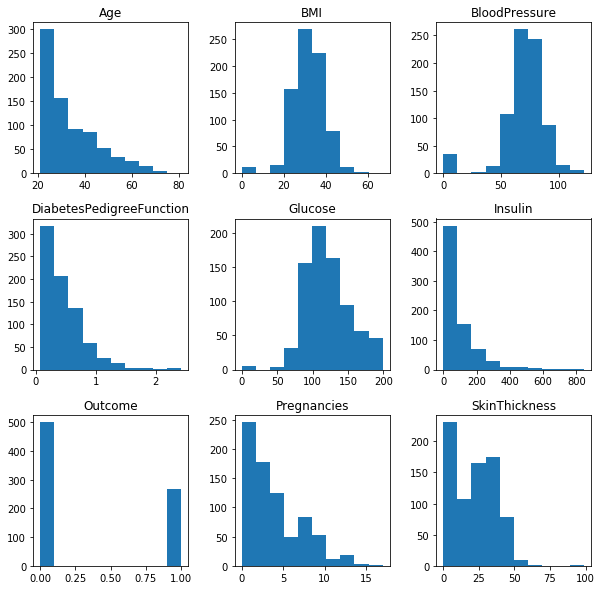

In [5]:
p = diabetes.hist(figsize = (10,10), grid = False)

In [6]:
diabetes_copy = diabetes.copy()
diabetes_copy = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
diabetes_copy = diabetes_copy.replace(0,np.NaN)

In [7]:
diabetes_copy.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
# diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)

In [9]:
copy_cols = ['Glucose','BloodPressure','SkinThickness','BMI']

In [10]:
for col in copy_cols:
    diabetes_copy[col].fillna(diabetes_copy[col].mean(), inplace = True)
    
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)    

In [11]:
X = pd.concat([diabetes_copy, diabetes[['Pregnancies', 'DiabetesPedigreeFunction', 'Age']]], axis = 1)
y = diabetes.Outcome

In [12]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00


In [13]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [14]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


#### What kind of scaler should we use?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html  
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [15]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## scikit-learn 4-step modeling pattern

<img src='img/sklearnsteps.png' width=500>

**Step 1:** Import the class you plan to use  

[k-NN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [18]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [20]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [21]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7135416666666666
F1: 0.6206896551724137


In [22]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[92 31]
 [24 45]]


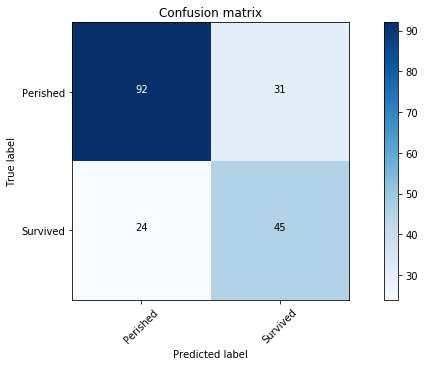

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for k

In [24]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [25]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7916666666666666
F1: 0.6875


In [26]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



Confusion Matrix, without normalization
[[108  15]
 [ 25  44]]


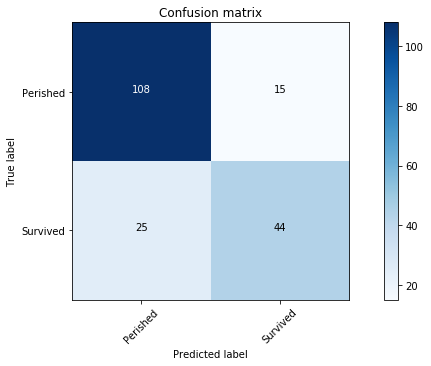

In [27]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of _k_ for _k_-NN


In [28]:
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7162611816476697, 0.7107601049293161, 0.7635538672378156, 0.7458455165692007, 0.78759765625, 0.7458455165692007, 0.7439091915836101, 0.7301812267657993, 0.754579641934293]


#### Visual comparison of different _K_s

This is not an ROC curve

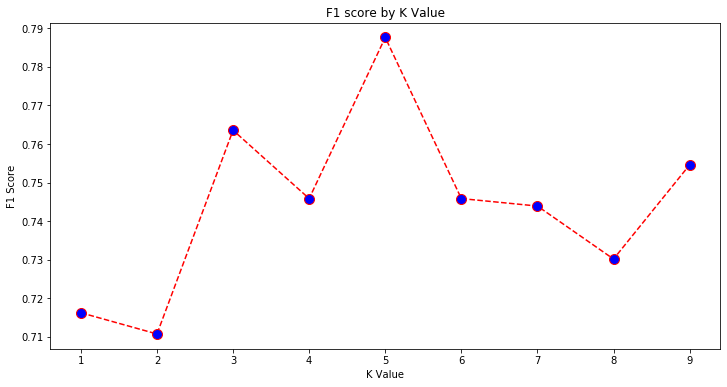

In [29]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of _k_ performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think _k_ size relates to our concepts of bias and variance?

<img src='img/K-NN_Neighborhood_Size_print.png' width=500>

## Advantages of _k_-NN

- Non-parametric
- No assumptions
- Versatile
- Very Handy

## Limitations of _k_-NN

- Does not work well in higher dimensions
- Computationally expensive
- Sensitive to noise and outliers


## Driving the point home

<img src='img/knn-process.png' width=800>




## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)